# TopSBM: Topic Modeling with Stochastic Block Models

A basic tutorial.


In [1]:
%load_ext autoreload
%autoreload 2

import os
import pylab as plt
%matplotlib inline  

from sbmtm import sbmtm
import graph_tool.all as gt

# Setup: Load a corpus

1) We have a list of documents, each document contains a list of words.

2) We have a list of document titles (optional) 

The example corpus consists of 63 articles from Wikipedia taken from 3 different categories (Experimental Physics, Chemical Physics, and Computational Biology).



In [2]:
path_data = ''

## texts
fname_data = 'corpus.txt'
filename = os.path.join(path_data,fname_data)

with open(filename,'r', encoding = 'utf8') as f:
    x = f.readlines()
texts = [h.split() for h in x]

## titles
fname_data = 'titles.txt'
filename = os.path.join(path_data,fname_data)

with open(filename,'r', encoding = 'utf8') as f:
    x = f.readlines()
titles = [h.split()[0] for h in x]

In [3]:
i_doc = 0
print(titles[0])
print(texts[i_doc][:10])


Nuclear_Overhauser_effect
['the', 'nuclear', 'overhauser', 'effect', 'noe', 'is', 'the', 'transfer', 'of', 'nuclear']


# Fitting the model

In [3]:
## we create an instance of the sbmtm-class
model = sbmtm()

## we have to create the word-document network from the corpus
model.make_graph(texts,documents=titles)

## we can also skip the previous step by saving/loading a graph
# model.save_graph(filename = 'graph.xml.gz')
# model.load_graph(filename = 'graph.xml.gz')

## fit the model
gt.seed_rng(32) ## seed for graph-tool's random number generator --> same results
model.fit()

# Plotting the result

The output shows the (hierarchical) community structure in the word-document network as inferred by the stochastic block model:

- document-nodes are on the left
- word-nodes are on the right
- different colors correspond to the different groups

The result is a grouping of nodes into groups on multiple levels in the hierarchy:

- on the uppermost level, each node belongs to the same group (square in the middle)
- on the next-lower level, we split the network into two groups: the word-nodes and the document-nodes (blue sqaures to the left and right, respectively). This is a trivial structure due to the bipartite character of the network.
- only next lower levels constitute a non-trivial structure: We now further divide nodes into smaller groups (document-nodes into document-groups on the left and word-nodes into word-groups on the right)

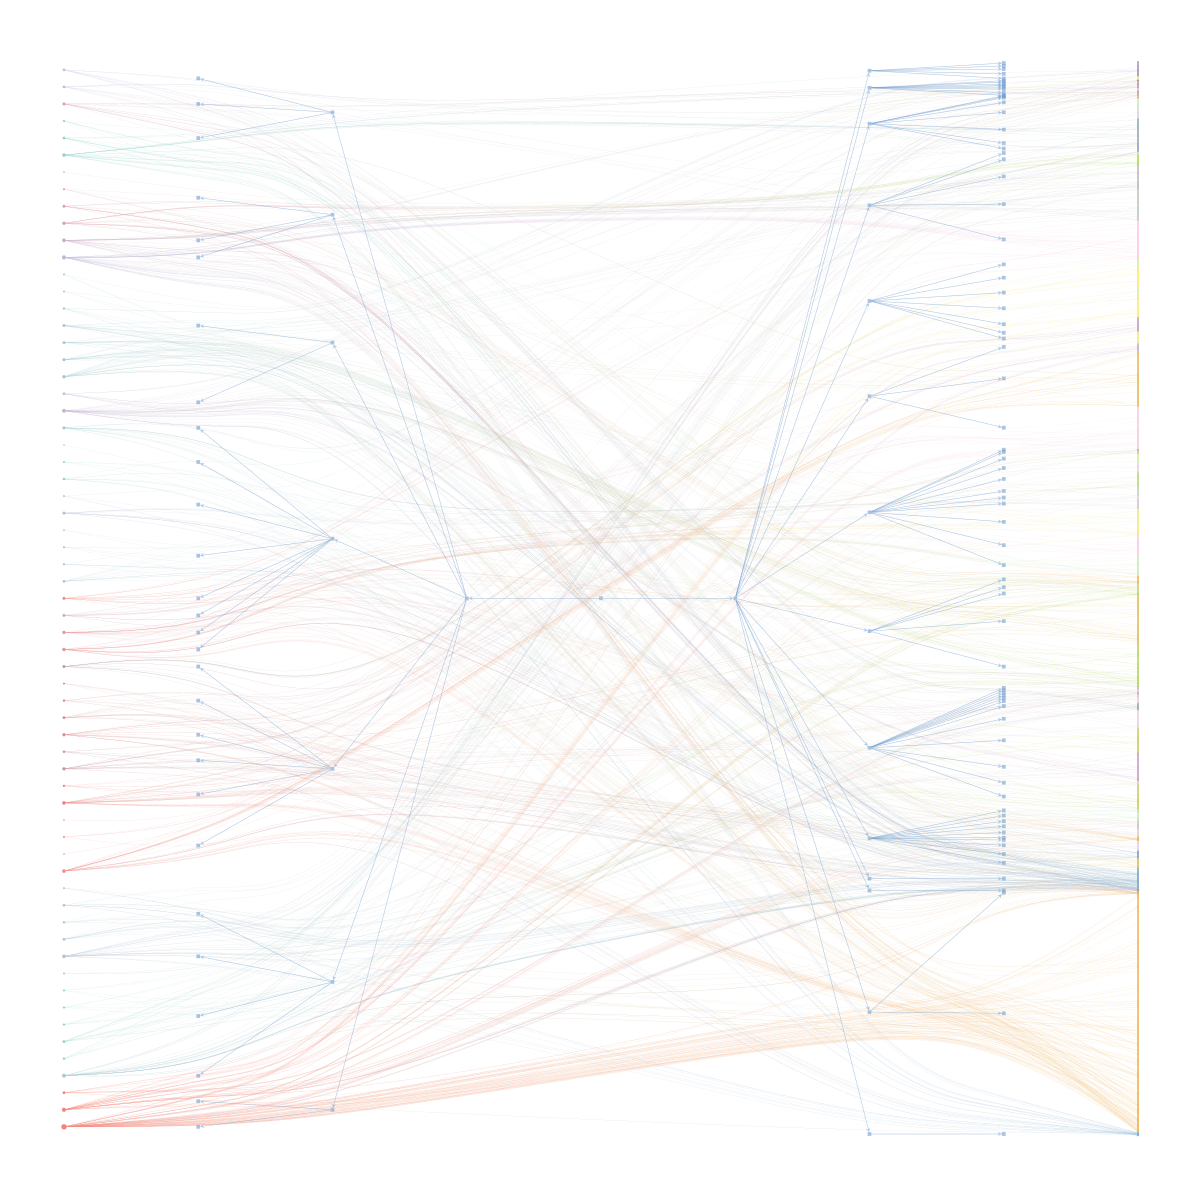

In [12]:
model.plot(nedges=1000)

# The basics

## Topics
For each word-group on a given level in the hierarchy, we retrieve the $n$ most common words in each group -- these are the topics!


In [13]:
model.topics(l=1,n=20)

{0: [('the', 0.6226892391515859),
  ('is', 0.15781280404748005),
  ('that', 0.0628526950768632),
  ('by', 0.05565285074917299),
  ('be', 0.053901537264059156),
  ('an', 0.047090873710838685)],
 1: [('when', 0.065343258891646),
  ('electron', 0.050454921422663356),
  ('spin', 0.03887510339123242),
  ('experimental', 0.034739454094292806),
  ('experiments', 0.033085194375516956),
  ('beam', 0.03143093465674111),
  ('frequency', 0.03143093465674111),
  ('electrons', 0.028949545078577336),
  ('nuclear', 0.023986765922249794),
  ('polarization', 0.02315963606286187),
  ('chemical', 0.02315963606286187),
  ('direction', 0.01902398676592225),
  ('proton', 0.01488833746898263),
  ('requires', 0.014061207609594707),
  ('cross', 0.013234077750206782),
  ('external', 0.013234077750206782),
  ('dnp', 0.01240694789081886),
  ('theoretical', 0.01240694789081886),
  ('material', 0.011579818031430935),
  ('beams', 0.011579818031430935)],
 2: [('law', 0.06455266138165346),
  ('electric', 0.061155152887

## Levels of Topics in hiearchy
To track the number of levels in the hiearchy, this is a property of the model.

In [15]:
print(model.L)

2


## Topic-order on visualization
For a given level in the hierarchy, the word groups (topics) will appear in a particular order on the visualization. Run this command to get that order (vertically stacked). Note: Levels start at 0 on the far-right side.

In [6]:
model.getTopicOrderingForLevel(1)

,topic_number
0,2
1,3
2,13
3,8
4,7
5,10
6,11
7,9
8,0
9,1


## Topic-distribution in each document
Which topics contribute to each document?

In [7]:
## select a document (by its index)
i_doc = 0
print(model.documents[i_doc])
## get a list of tuples (topic-index, probability)
model.topicdist(i_doc,l=1)

Nuclear_Overhauser_effect


[(0, 0.9090909090909091), (1, 0.09090909090909091), (2, 0.0)]

# Extra: Clustering of documents - for free.
The stochastic block models clusters the documents into groups.
We do not need to run an additional clustering to obtain this grouping.


In [8]:
model.clusters(l=1,n=5)

{0: [('Wave_tank', 1.0),
  ('X-ray_standing_waves', 1.0),
  ('Complementary_experiments', 1.0),
  ('Particle-induced_X-ray_emission', 1.0),
  ('Ripple_tank', 1.0)],
 1: [('Fuel_mass_fraction', 1.0),
  ("Newton's_laws_of_motion", 1.0),
  ('Pauli_effect', 1.0),
  ('Experimental_physics', 1.0),
  ('Ziff-Gulari-Barshad_model', 1.0)],
 2: [('De_novo_transcriptome_assembly', 1.0),
  ('Premier_Biosoft', 1.0),
  ('Line_source', 1.0),
  ('BioUML', 1.0),
  ('Bioinformatics', 1.0)]}

Application -- Finding similar articles:

For a query-article, we return all articles from the same group

In [9]:
## select a document (index)
i_doc = 2
print(i_doc,model.documents[i_doc])
## find all articles from the same group
## print: (doc-index, doc-title)
model.clusters_query(i_doc,l=1,)

2 Rovibrational_coupling


[(0, 'Nuclear_Overhauser_effect'),
 (1, 'Quantum_solvent'),
 (3, 'Effective_field_theory'),
 (5, 'Rotational_transition'),
 (6, 'Dynamic_nuclear_polarisation'),
 (7, 'Knight_shift'),
 (8, 'Polarizability'),
 (9, 'Anisotropic_liquid'),
 (10, 'Rotating_wave_approximation'),
 (11, 'RRKM_theory'),
 (12, 'Molecular_vibration'),
 (14, 'Electrostatic_deflection_(structural_element)'),
 (15, 'Magic_angle_(EELS)'),
 (16, 'Reactive_empirical_bond_order'),
 (17, 'Photofragment-ion_imaging'),
 (18, 'Molecular_beam'),
 (21, 'Empirical_formula'),
 (25, 'Uncertainty'),
 (26, 'Ripple_tank'),
 (27, 'Particle-induced_X-ray_emission'),
 (29, 'Complementary_experiments'),
 (31, 'Wave_tank'),
 (34, 'Faraday_cup_electrometer'),
 (36, 'X-ray_standing_waves'),
 (40, 'Fragment_separator'),
 (41, 'Dynamic_mode_decomposition'),
 (43, 'Holometer'),
 (44, 'Quantum_oscillations_(experimental_technique)')]

# More technical: Group membership
In the stochastic block model, word (-nodes) and document (-nodes) are clustered into different groups.

The group membership can be represented by the conditional probability $P(\text{group}\, |\, \text{node})$. Since words and documents belong to different groups (the word-document network is bipartite) we can show separately:

- P(bd | d), the probability of document $d$ to belong to document group $bd$
- P(bw | w), the probability of word $w$ to belong to word group $bw$.

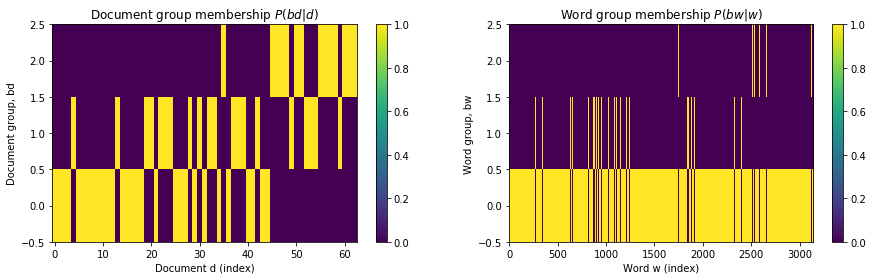

In [10]:
p_td_d,p_tw_w = model.group_membership(l=1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.imshow(p_td_d,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Document group membership $P(bd | d)$')
plt.xlabel('Document d (index)')
plt.ylabel('Document group, bd')
plt.colorbar()

plt.subplot(122)
plt.imshow(p_tw_w,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(bw | w)$')
plt.xlabel('Word w (index)')
plt.ylabel('Word group, bw')
plt.colorbar()